In [11]:
import pandas as pd
import geopandas as gpd 
import process as fe 
from matplotlib import pyplot as plt 
import seaborn as sns 

sns.set();

In [12]:
stations, evasions, census, lines, nyc = fe.load_all_data()

In [13]:
station_race_groups = evasions.groupby(['station_id', 'PERP_RACE'])

race_arrests_station = station_race_groups[['ARREST_KEY']].count().reset_index().pivot(
                            index='station_id',
                            columns='PERP_RACE',
                            values='ARREST_KEY'
                        ).reset_index().set_index('station_id').fillna(0)

readable_race_strs = [
    'Native American',
    'Asian',
    'Black',
    'Black Hispanic',
    'Unknown',
    'White',
    'White Hispanic'
]



race_name_dict = {k:v for k, v in zip(race_arrests_station.columns, readable_race_strs)}
race_arrests_station = race_arrests_station.rename(race_name_dict, axis=1)
# race_arrests_station = race_arrests_station[races_ord]

In [14]:
stations[race_arrests_station.columns] = race_arrests_station

stations = stations.fillna(0)

In [15]:
pal = sns.xkcd_palette([   
        'coral',
        'tangerine',
        'blue green',
        'dark magenta',
        'dark blue',
        'purple',
        'white',
        ]
      )

races_ord = ['Native American', 'Asian', 'Black', 'Black Hispanic', 'White Hispanic', 'White', 'Unknown']

In [34]:
def make_pie(row, labels=races_ord, pal=pal, dpi=200):
    if row['arrests'] == 0:
        return
    
    patches, texts = plt.pie(row[races_ord], colors=pal)
    plt.legend(patches, races_ord,loc="lower left", bbox_to_anchor=(-.5,0.2))
    plt.savefig(f'figs/{row["complex_id"]}.png', dpi=dpi)

0      None
1      None
2      None
3      None
4      None
       ... 
420    None
421    None
422    None
423    None
424    None
Length: 425, dtype: object

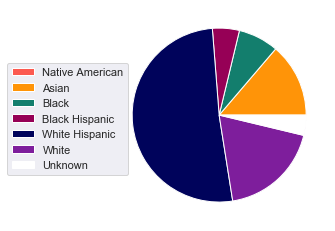

In [35]:
stations.reset_index().apply(make_pie, axis=1)

In [2]:
? plt.savefig

Signature:  plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The output formats available depend on the backend being used.

Parameters
----------

fname : str or PathLike or file-like object
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is not set, then the output format is inferred from
    the extension of *fname*, if any, and from :rc:`savefig.format`
    otherwise.  If *format* is set, it determines the output format.

    Hence, if *fname* is not a path or has no extension, remember to
    specify *format* to ensure that the correct backend is used.

Other Parameters
----------------

dpi : [ *None* | scalar > 0 |